# Scenario Discovery Basecase

Thesis: Robust climate policies
Author: Mark Hupkens
SN: 4167813


In this scenario discovery:
- scenario discovery with new data
- experiments performed with extra uncertainties on fractions to district heating
- extra kpi (total renovated houses) == same as policy models

### Importing the necessary Python modules

In [1]:
import thesis_utils as tu # specified own utilities package to make thesis life easier (thesis.utils.py)
import time

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
# import mpld3

from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis.plotting_util import KDE
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench.util import load_results
from ema_workbench.analysis.plotting import lines, plot_lines_with_envelopes, envelopes  

# %matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\LocalAdmin\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:22: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


### 1. Loading the data

This basecase analysis relies on experiments performd in the notebook '20190715 - Experiments Basemodel-V6 - extra uncertainty district heating.ipynb'. 1000 experiments have been simulated without any policies, but with defined uncertainties.

* See notebook '20190715 - Experiments Basemodel-V6 - extra uncertainty district heating.ipynb' for experimental design
* See Vensim model '20190715_Energymodel_Labour_basecase.mdl' for the model structure.

In [60]:
# Select run
fn = 'results/20190715_experiments_energymodel_labour_base_ensempble.tar.gz'
results = load_results(fn)
experiments, outcomes = results

[MainProcess/INFO] results loaded succesfully from C:\Users\LocalAdmin\Desktop\ETModel\results\20190715_experiments_energymodel_labour_base_ensempble.tar.gz


### 2. Plotting kernel density estimations graphs of aggregated results

KPI's in basecase analysis:

1. Total CO2-eq emission [Ton CO2]
2. Total costs [euro]
3. Total renovated houses [# houses]
4. Labour deficiency (all-electric, district heating) [hours]

In [62]:
# list(outcomes.keys())[1:]

#### 1. Total CO2-eq emission

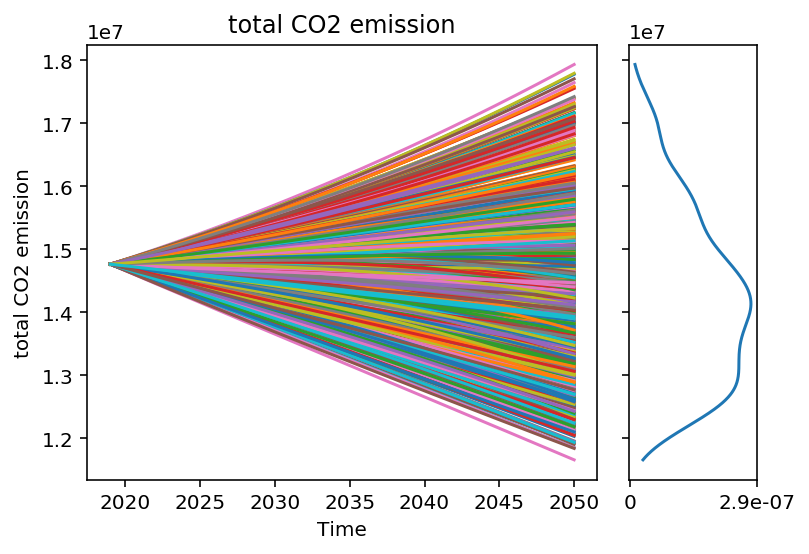

In [61]:
fig, axes = lines(results, density=u'kde', show_envelope=False, outcomes_to_show='total CO2 emission')
plt.savefig('C:/Users/LocalAdmin/Desktop/ETModel/plots/scenario_basecase/'+time.strftime('%Y%m%d')+'total_co2.png',dpi=300,)
plt.show()

#### 2. Total costs

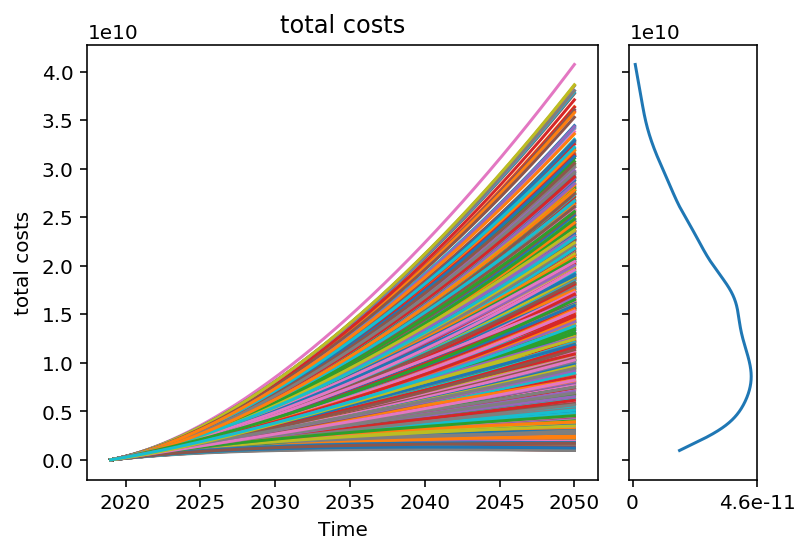

In [63]:
fig, axes = lines(results, density=u'kde', show_envelope=False, outcomes_to_show='total costs')
plt.savefig('C:/Users/LocalAdmin/Desktop/ETModel/plots/scenario_basecase/'+time.strftime('%Y%m%d')+'total_costs.png',dpi=300)
plt.show()

#### 3. Total Renovated houses

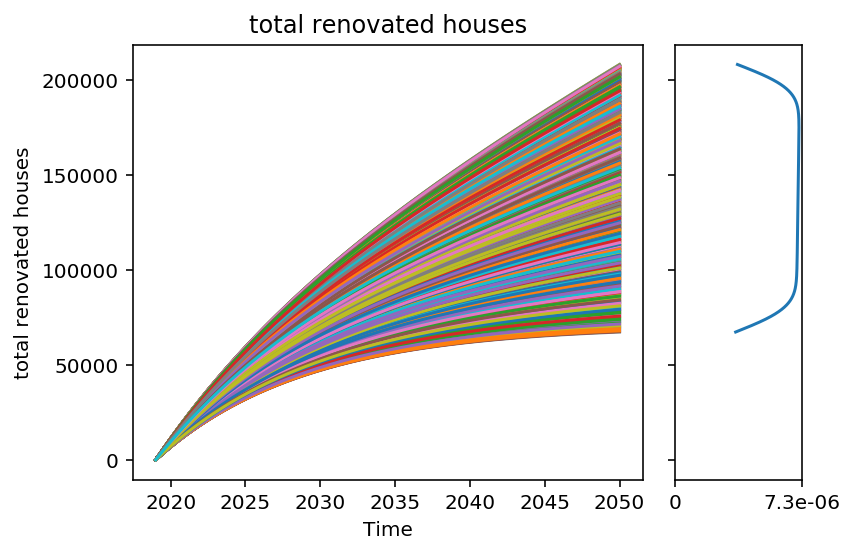

In [64]:
fig, axes = lines(results, density=u'kde', show_envelope=False, outcomes_to_show='total renovated houses')
plt.savefig('C:/Users/LocalAdmin/Desktop/ETModel/plots/scenario_basecase/'+time.strftime('%Y%m%d')+'total_renovated_houses.png',dpi=300)
plt.show()

#### 4.A Labour deficiency (all-electric) [hours]

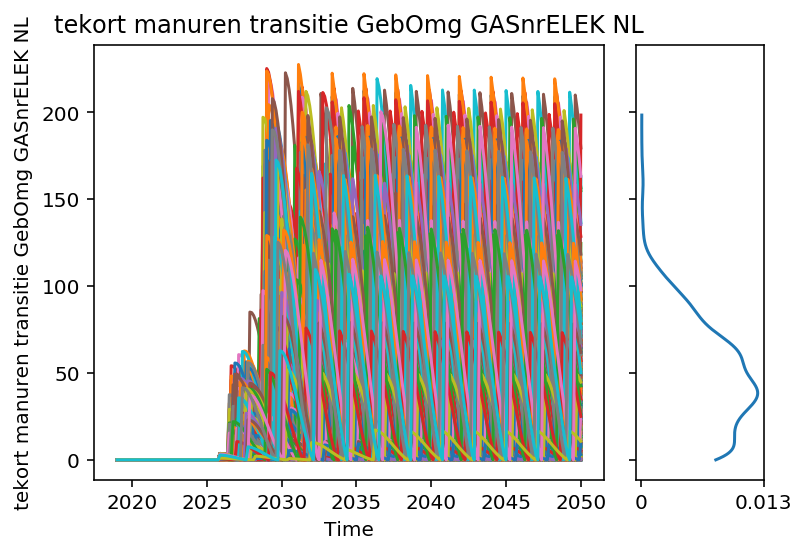

In [65]:
fig, axes = lines(results, density=u'kde', show_envelope=False, outcomes_to_show='tekort manuren transitie GebOmg GASnrELEK NL')
plt.savefig('C:/Users/LocalAdmin/Desktop/ETModel/plots/scenario_basecase/'+time.strftime('%Y%m%d')+'tekort_manuren_elek.png',dpi=300)
plt.show()

#### 4.B Labour deficiency (district heating) [hours]

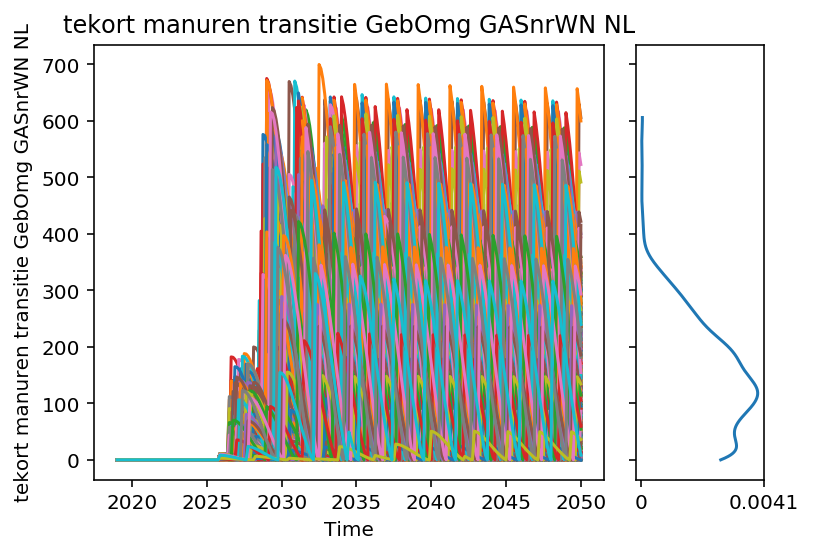

In [66]:
fig, axes = lines(results, density=u'kde', show_envelope=False, outcomes_to_show='tekort manuren transitie GebOmg GASnrWN NL')
plt.savefig('C:/Users/LocalAdmin/Desktop/ETModel/plots/scenario_basecase/'+time.strftime('%Y%m%d')+'tekort_manuren_warmtenet.png',dpi=300)
plt.show()

### PRIM total CO2

In [67]:
def classify(data):
    i = 'total CO2 emission' # unit in ton
    outcome = np.max(outcomes[i], axis=1)
    classes = np.zeros(outcome.shape[0])
    classes[outcome> (.92 * outcomes['total CO2 emission'].max())] = 1 #E^6 Megaton
    return classes

prim_obj = prim.setup_prim(results, classify, threshold=0.8)
box_1 = prim_obj.find_box()

[MainProcess/INFO] 1000 points remaining, containing 67 cases of interest
[MainProcess/INFO] mean: 0.9245283018867925, mass: 0.053, coverage: 0.7313432835820896, density: 0.9245283018867925 restricted_dimensions: 4


Multiple dimensions have been restricted in the peeling process. The final box contains 67 cases of interests after reaching a density of 0.92 (cases of interest in the box) and a coverage of 0.73 (cases included in the box of all cases in experiments)

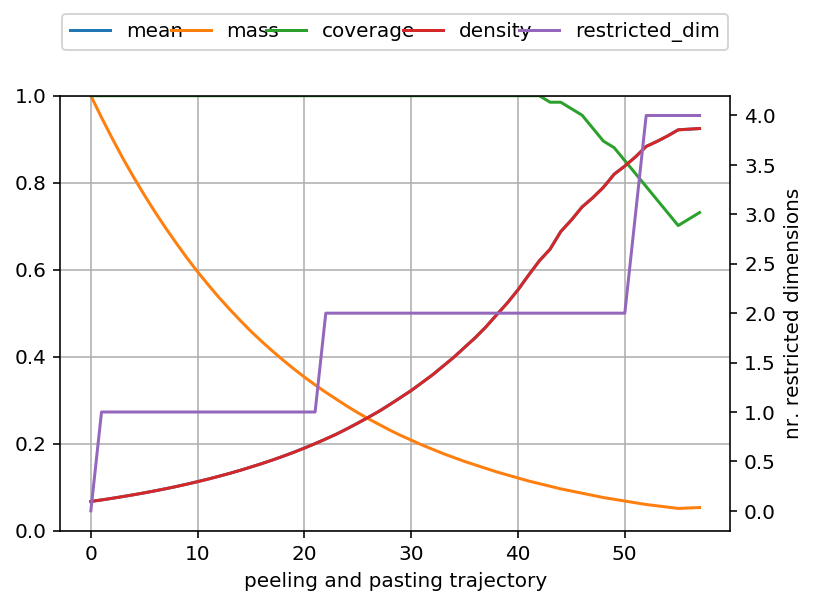

In [68]:
# % matplotlib notebook

box_1.show_ppt()
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_showppt_box_1.png', dpi=300,bbox_inches = "tight")
plt.show()

multiple dimensions have been restricted in 50 iterations shown below:

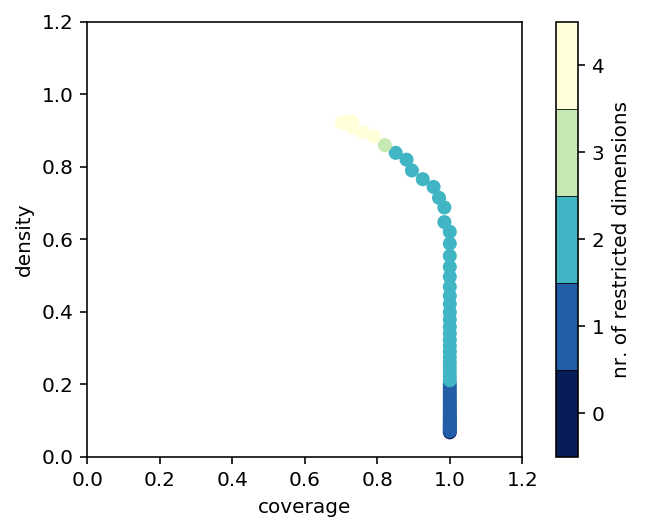

In [69]:
box_1.show_tradeoff()
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_tradeoff_box_1.png', dpi=300,bbox_inches = "tight")
plt.show()

As the PRIM algorithm restricts more and more dimensions, it _peels_ layers of uncertainties in the subspace. Hence, we want to look at boxes at the top left of the density/coverage curve. At the highest density, the following uncertainties are most influential:

coverage    0.731343
density     0.924528
mass           0.053
mean        0.924528
res dim            4
Name: 57, dtype: object

                                                          box 57            \
                                                             min       max   
groei gem elek gebruik                              5.918055e-03  0.009991   
fr innovation CoM                                   8.016297e-01  0.899977   
standard renovation rate                            2.620310e-07  0.000927   
fr to district heat koop low existing infrastru...  1.000408e-01  0.298160   

                                                                  
                                                       qp values  
groei gem elek gebruik                              2.378311e-26  
fr innovation CoM                                   3.026049e-20  
standard renovation rate                            3.162436e-01  
fr to district heat koop low existing infrastru...  6.289372e-01  

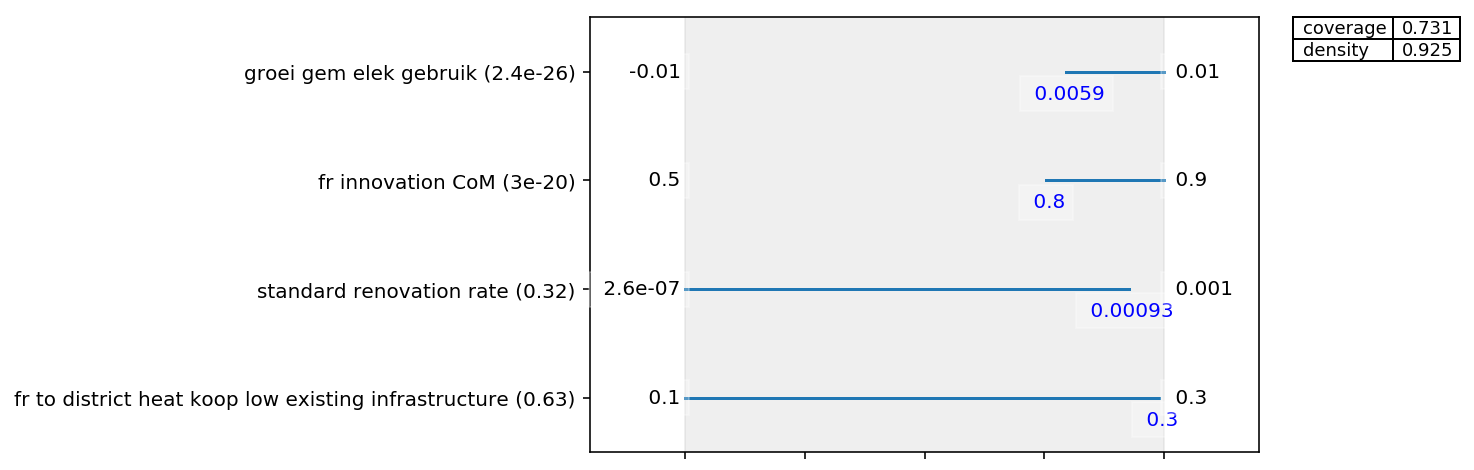

In [70]:
box_1.inspect()
box_1.inspect(style='graph')
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_graph_box_1.png', dpi=300,bbox_inches = "tight")
plt.show()

#### Conclusion PRIM Total CO2

Of the 4 uncertainties portrayed in the graphs only the first two statistically significant (p<0.05), namely:

- average electricity demand growth (groei gem elek gebruik): p =2.4e-26
- fraction innovation in carbon intensity of power generation (fr innovation CoM): p = 3e-20

These two significant uncertainties make sense, because the electricity growth rate directly influences total energy consumed (and thus the total CO2 emitted). Second, the innovation in carbon intensity of power generation, too, directly influences total CO2 output  as it describes the innovation of carbon reduction in the power sector.

The standard renovation rate and the fraction of privately owned homes that will switch to district heatingin the case of limited capacity also come up as important, but not as significant. They do, however, deserve some more attention. The standard renovation rate, as follows from the current climate agreement provides a baseline renovation rate without any additional policies. Its very intersting that this standard renovation rate does not show up as significant in the model. Rather, average electricity growth an innovation in carbon intensity of power generation are more significant. Looking at these results from a systemic perspective, this is an interesting finding, but reductions have to be made over all sectors to reach targets.

As most houses fall in the category 'district heat no existing infrastructure', second 'district heat low existing infrastructure' and least in 'district heat high existing infrastructure' it makes sense that the low variant for privately owned homes pops up in this PRIM analysis. It is the first of these three groups (no, low, high existing infrastructure) that has an impact carbon reduction (as acquisition of new district heat sources is scoped out of this study), and more houses belong to this group rather than the group of high existing infrastructure.


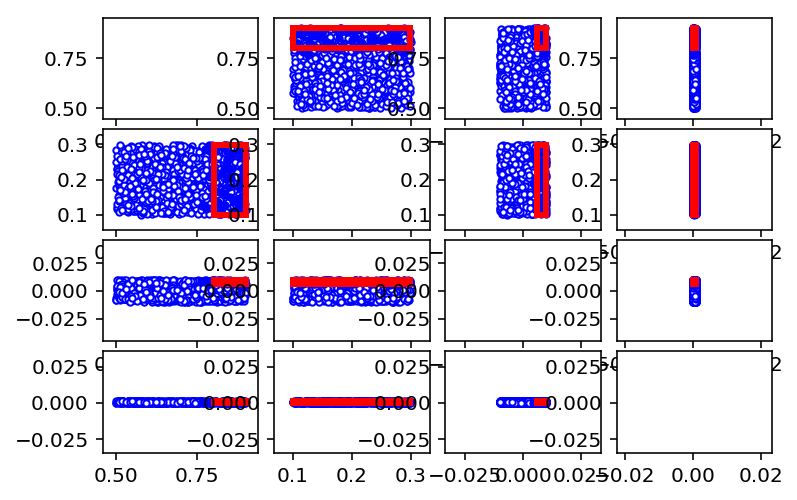

In [34]:
# box_1.select(21)
fig = box_1.show_pairs_scatter()
plt.show()

small boxes

### PRIM Total costs

In [71]:
def classify(data):
    i = 'total costs' 
    outcome = np.max(outcomes[i], axis=1)
    classes = np.zeros(outcome.shape[0])
    classes[outcome> (.70 * outcomes[i].max())] = 1 
    return classes

prim_obj = prim.setup_prim(results, classify, threshold=0.8)
box_2 = prim_obj.find_box()

[MainProcess/INFO] 1000 points remaining, containing 69 cases of interest
[MainProcess/INFO] mean: 0.9215686274509803, mass: 0.051, coverage: 0.6811594202898551, density: 0.9215686274509803 restricted_dimensions: 4


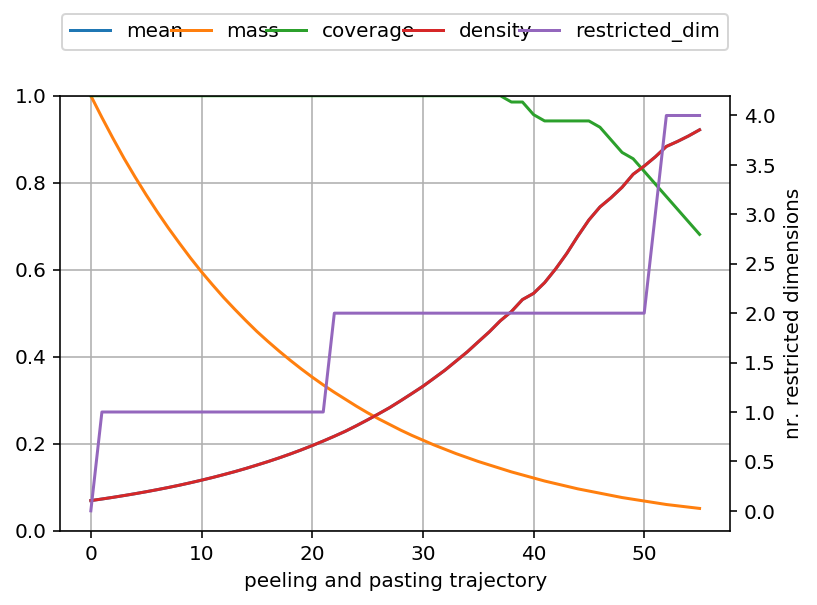

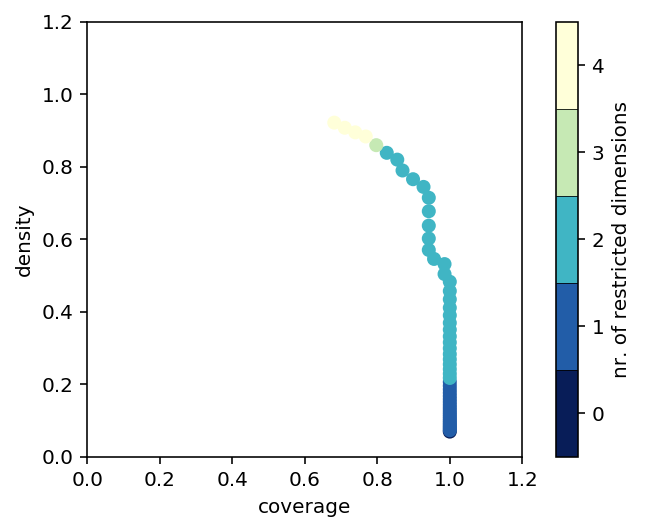

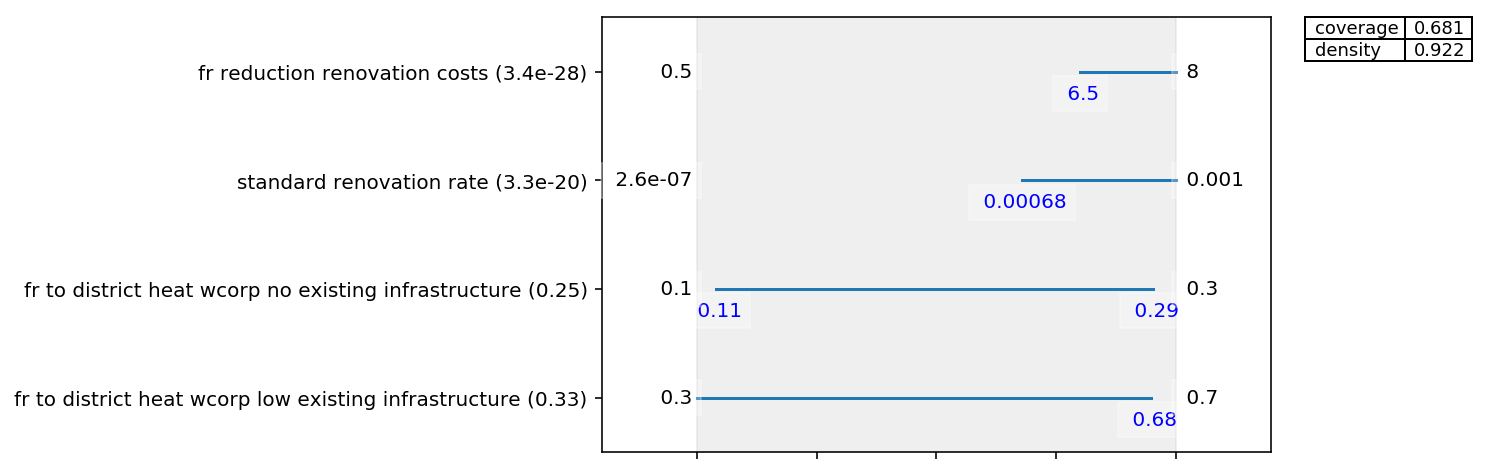

In [72]:
# make plots
box_2.show_ppt()
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_showppt_box_2_costs(koop).png', dpi=300,bbox_inches = "tight")

box_2.show_tradeoff()
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_tradeoff_box_2_costs(koop).png', dpi=300,bbox_inches = "tight")

box_2.inspect(style='graph')
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_graph_box_2_costs(koop).png', dpi=300,bbox_inches = "tight")

plt.show()

#### Conclusion PRIM Total costs

Of the 4 uncertainties portrayed in the graphs only the first two statistically significant (p<0.05) within the most dense box (coverage = 0.68, density = 0.92), namely:

- fr reduction renovation costs (p=3.4e-28)
- standard renovation rate (p=3.3e-20)

It appears obvious that the two uncertainties mentioned above are significant in their contribution to total costs. The first uncertainty directly influences individual renovation costs. The second uncertainty defines the number of houses to be renovated in case of no additional policy.

The two final two uncertainties, fr to district heat wcorp no existing infrastructure and fr to district heat wcorp low existing infrastructure, are do spike interest. Building corporations are less dependent on merely financial incentives due to their societal goals. Moreover, most corporation owned homes are in neighbourhoods with no or low existing district heating capacity. Hence, the higher the propensity of these groups is to renovate, the larger their effect on total costs.



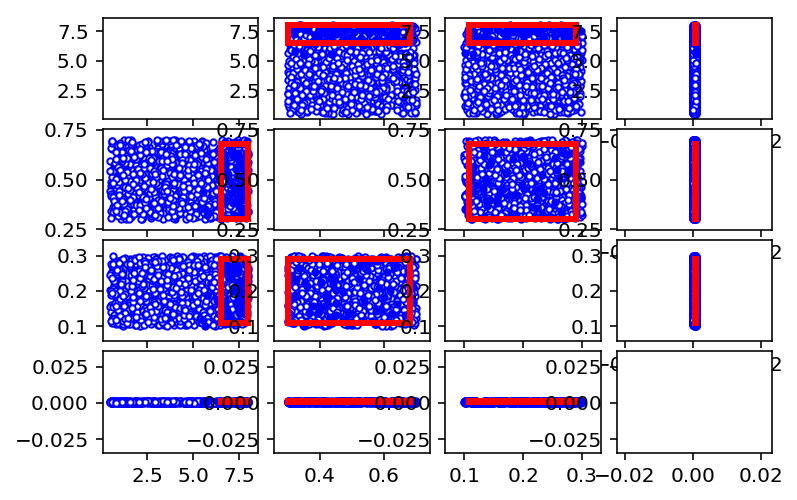

In [45]:
box_2.show_pairs_scatter()
plt.show()

### Manhours Electricity

In [81]:
i= 'tekort manuren transitie GebOmg GASnrELEK NL' 
def classify(data):
    i = 'tekort manuren transitie GebOmg GASnrELEK NL' 
    outcome = np.max(outcomes[i], axis=1)
    classes = np.zeros(outcome.shape[0])
    classes[outcome> (.75 * outcomes[i].max())] = 1 
    return classes

prim_obj = prim.setup_prim(results, classify, threshold=0.8)
box_3 = prim_obj.find_box()

[MainProcess/INFO] 1000 points remaining, containing 66 cases of interest
[MainProcess/INFO] mean: 0.9622641509433962, mass: 0.053, coverage: 0.7727272727272727, density: 0.9622641509433962 restricted_dimensions: 4


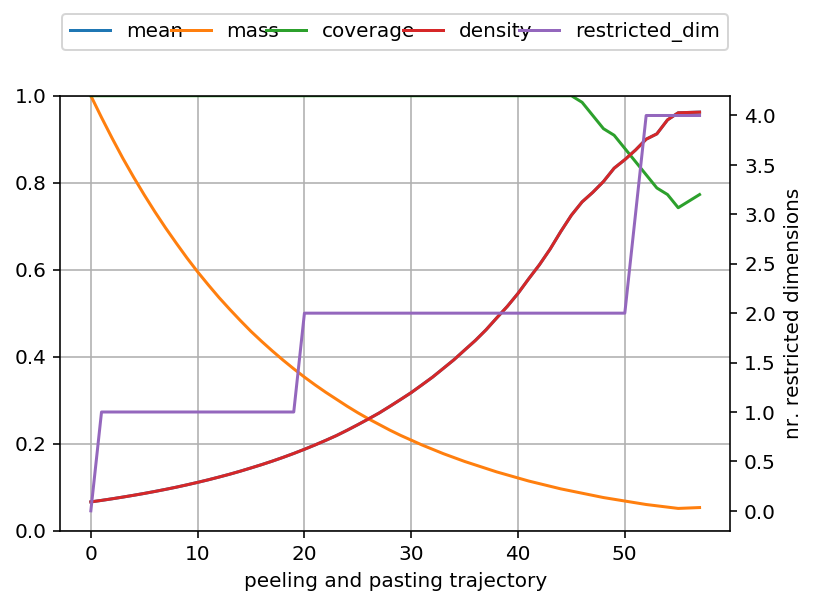

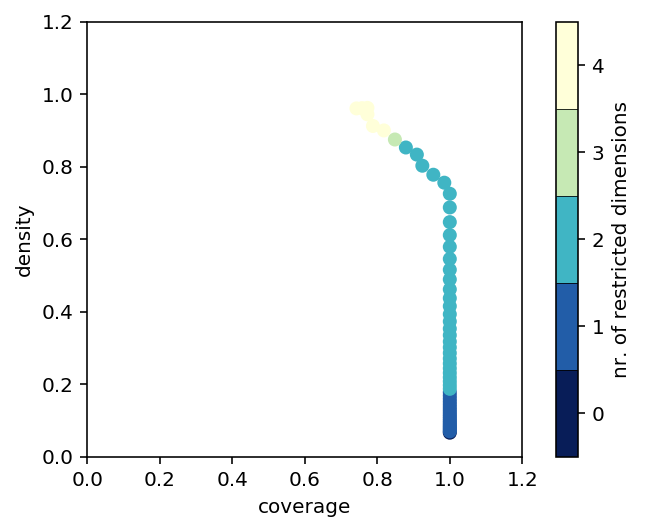

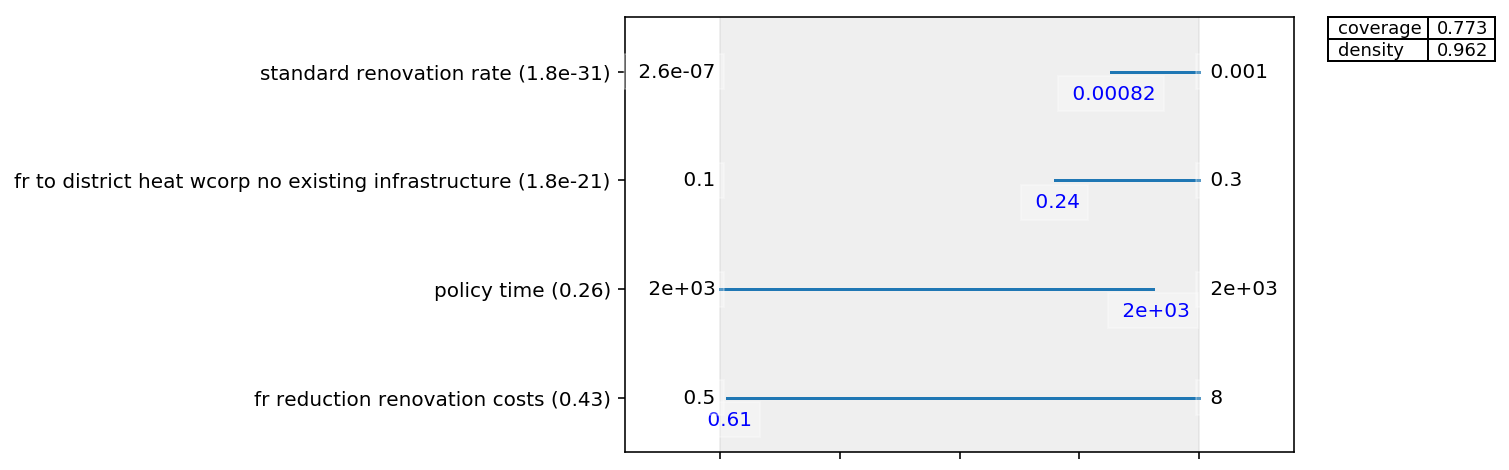

In [82]:
# make plots

box_3.show_ppt()
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_showppt_box_3_'+i+'.png', dpi=300,bbox_inches = "tight")

box_3.show_tradeoff()
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_tradeoff_box_3_'+i+'.png', dpi=300,bbox_inches = "tight")

box_3.inspect(style='graph')
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_graph_box_3_'+i+'.png', dpi=300,bbox_inches = "tight")

plt.show()

#### Conclusion PRIM labour deficiency electricity

The PRIM analysis shows two out of four significant uncertainties in the most dense box. Namely,

- Standard renovation rate (p=1.8e-31)
- fr to district heat wcorp no existing infrastructure (p=1.8e-21)

In the case of no policy, relatively few homes will be renovated and all of these will be explained by the standard renovation rate, which explains the first significant uncertainty. The second significant uncertainty might seem peculiar at first sight, as this PRIM analysis focuses on labour deficiency for renovations to all-electric housing. The model, however, is limited to three heating generation types (gas, district heating or all-electric). Hence, if a house is renovated it is either connected to district heating or made all-electric. In the case that current district heating capacity is too little, the house has to be made all-electric. This explains the importance of the renovation to district heating if there is no exsiting infrastructure.


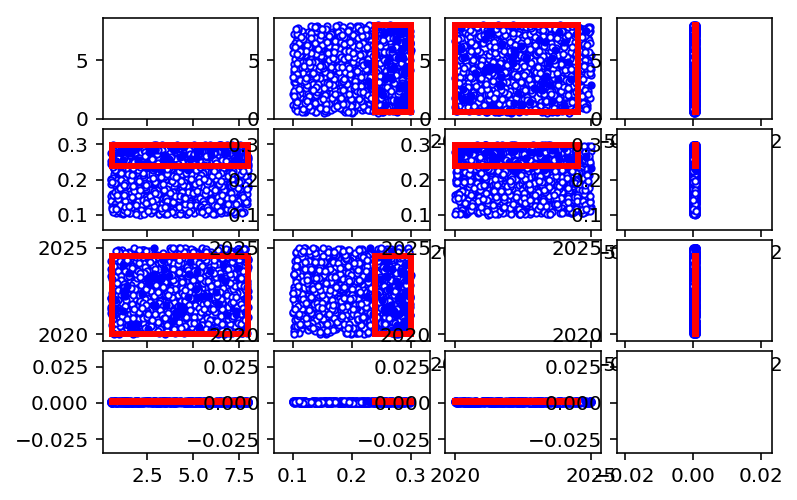

In [54]:
box_3.show_pairs_scatter()
plt.show()

small boxes

### Labour deficiency District heating

In [83]:
i= 'tekort manuren transitie GebOmg GASnrWN NL' 
def classify(data):
    i = 'tekort manuren transitie GebOmg GASnrWN NL' 
    outcome = np.max(outcomes[i], axis=1)
    classes = np.zeros(outcome.shape[0])
    classes[outcome> (.75 * outcomes[i].max())] = 1 
    return classes

prim_obj = prim.setup_prim(results, classify, threshold=0.8)
box_4 = prim_obj.find_box()

[MainProcess/INFO] 1000 points remaining, containing 56 cases of interest
[MainProcess/INFO] mean: 0.8431372549019608, mass: 0.051, coverage: 0.7678571428571429, density: 0.8431372549019608 restricted_dimensions: 3


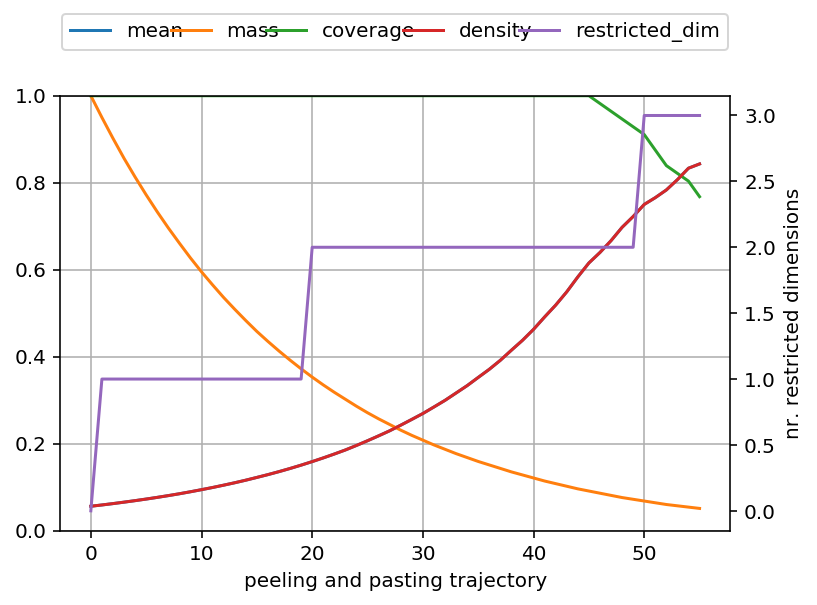

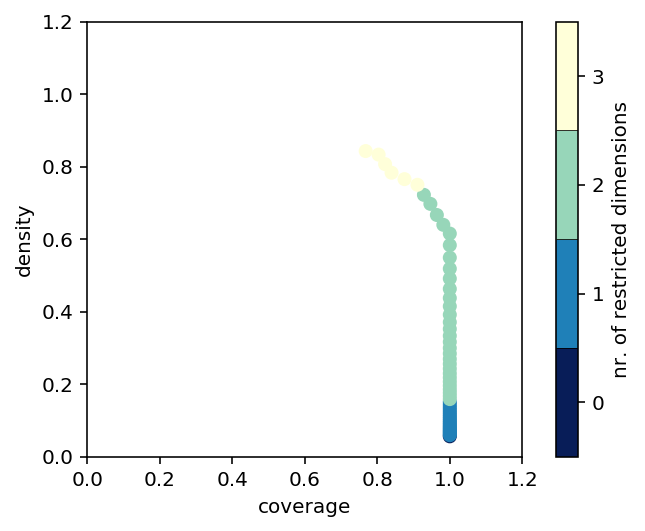

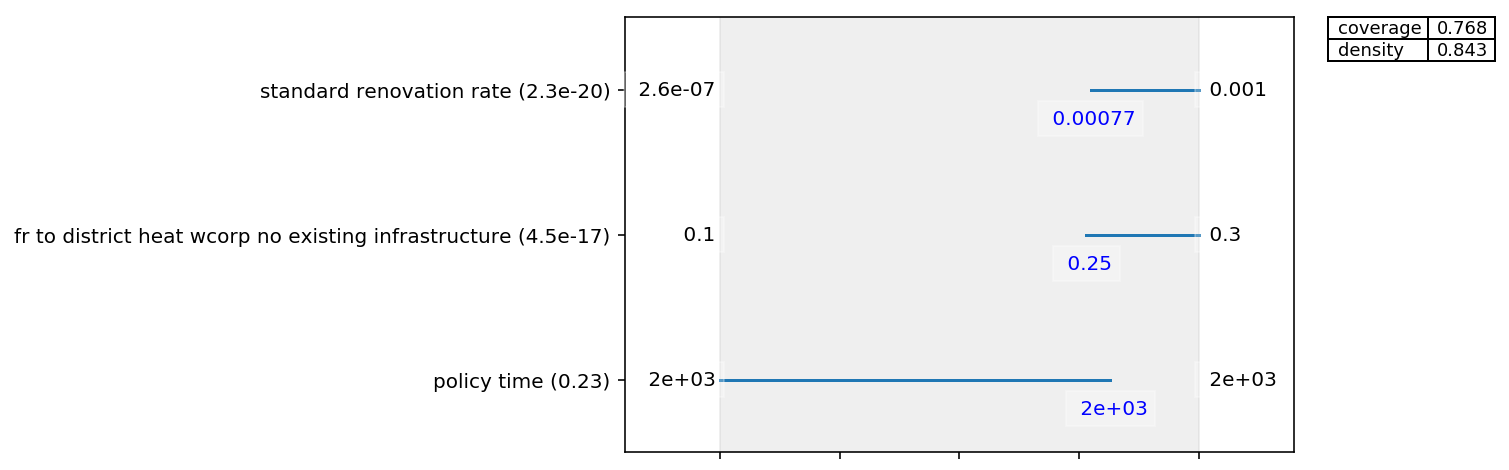

In [85]:
# make plots

box_4.show_ppt()
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_showppt_box_4_'+i+'.png', dpi=300,bbox_inches = "tight")

box_4.show_tradeoff()
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_tradeoff_box_4_'+i+'.png', dpi=300,bbox_inches = "tight")

box_4.inspect(style='graph')
plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_graph_box_4_'+i+'.png', dpi=300,bbox_inches = "tight")

# save figures

plt.show()

#### Conclusion PRIM labour deficiency district heating

The PRIM analysis shows two out of three significant uncertainties in the most dense box. Namely,

- Standard renovation rate (p=2.3e-20)
- fr to district heat wcorp no existing infrastructure (p=4.5e-17)

In the case of no policy, relatively few homes will be renovated and all of these will be explained by the standard renovation rate, which explains the first significant uncertainty. The second significant uncertainty might seem peculiar at first sight, as this PRIM analysis focuses on labour deficiency for renovations to all-electric housing. The model, however, is limited to three heating generation types (gas, district heating or all-electric). Hence, if a house is renovated it is either connected to district heating or made all-electric. In the case that current district heating capacity is too little, the house has to be made all-electric. This explains the importance of the renovation to district heating if there is no exsiting infrastructure.

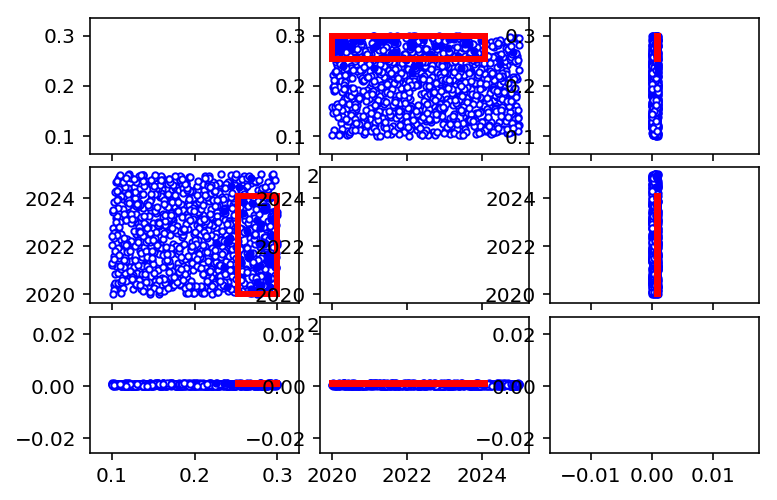

In [59]:
box_4.show_pairs_scatter()
plt.show()

### PRim total renovated houses

In [80]:
def classify(data):
    i = 'total renovated houses' 
    outcome = np.max(outcomes[i], axis=1)
    classes = np.zeros(outcome.shape[0])
    classes[outcome> (.95 * outcomes[i].max())] = 1 
    return classes

prim_obj = prim.setup_prim(results, classify, threshold=0.8)
box_5 = prim_obj.find_box()

[MainProcess/INFO] 1000 points remaining, containing 75 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.072, coverage: 0.96, density: 1.0 restricted_dimensions: 1


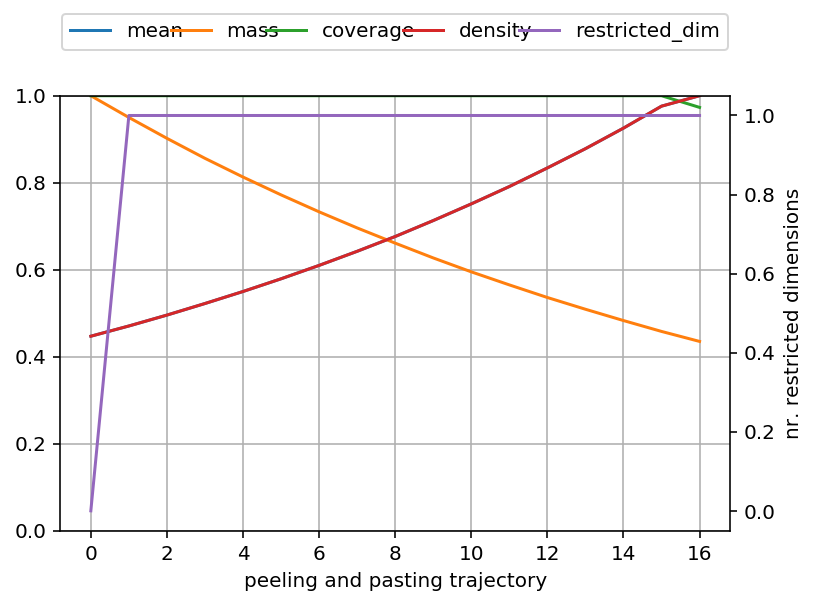

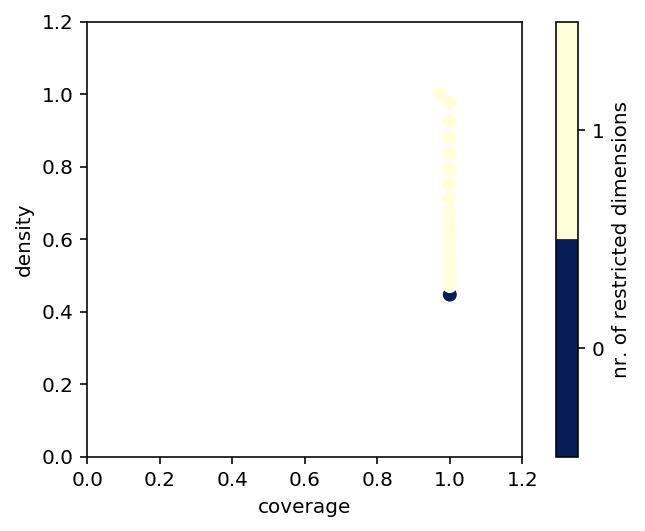

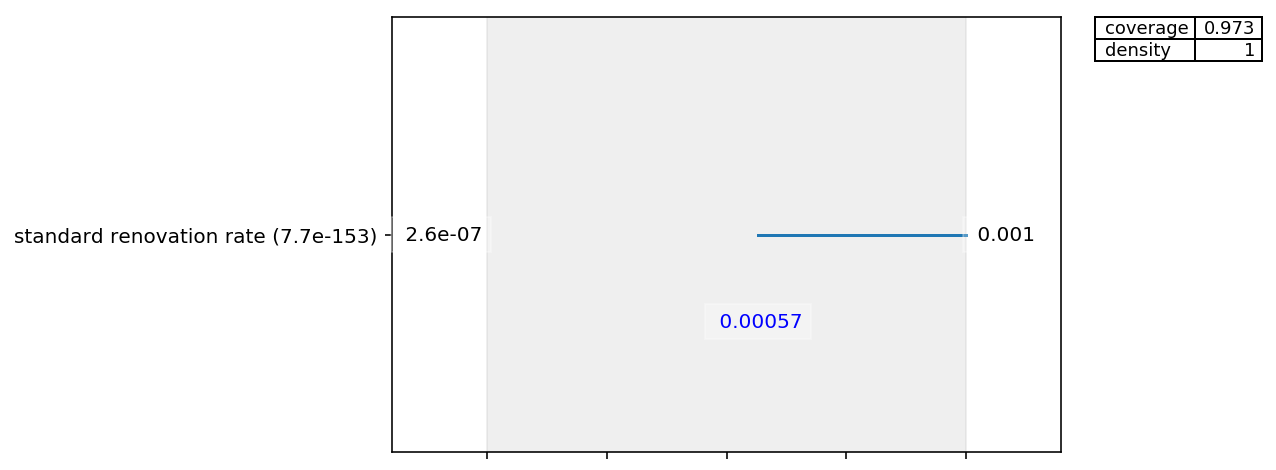

In [78]:
# make plots

box_5.show_ppt()
# plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_showppt_box_4_'+i+'.png', dpi=300,bbox_inches = "tight")

box_5.show_tradeoff()
# plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_tradeoff_box_4_'+i+'.png', dpi=300,bbox_inches = "tight")

box_5.inspect(style='graph')
# plt.savefig('plots/scenario_basecase/'+time.strftime('%Y%m%d')+'PRIM_graph_box_4_'+i+'.png', dpi=300,bbox_inches = "tight")

# save figures

plt.show()